**Лабораторная 5. Деревья решений**

Задание

Выбор датасета

Я на восьмой позиции в группе, поэтому использую датасет про грибы

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import itertools
from typing import Union
import warnings
import math
from collections import Counter

eps = 1e-9

path = "/home/uvusibuneka/Desktop/СИИ/Module 2/lab5/mushroom.csv"
df = pd.read_csv(path)

target_name = 'poisonous'
df

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [2]:
df.columns

Index(['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

Предварительная обработка данных

In [3]:
target = df[target_name]
df = df.drop(target_name, axis=1)
df.dropna()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


Выберем случайным образом sqrt(n) признаков

In [4]:
count = len(df.T) - round(math.sqrt(len(df.T))) + 6
drop_features = rnd.choices(k=count, population=df.columns)
if target_name in drop_features:
    drop_features.remove(target_name)
print(len(df.T))
df = df.drop(columns=drop_features, axis=1)
print(len(df.T))

22
5


Разобьем выборку

In [5]:
df[target_name] = target
df_train = df.sample(frac=0.9)
X_train, y_train = df_train.drop(target_name, axis=1), df_train[target_name]
X_test, y_test = df.drop(df_train.index).drop(target_name, axis=1), df.drop(df_train.index)[target_name]

Статистика по датасету

In [6]:
df.describe()

,cap-shape,odor,gill-attachment,veil-color,ring-number,poisonous
count,8124,8124,8124,8124,8124,8124
unique,6,9,2,4,3,2
top,x,n,f,w,o,e
freq,3656,3528,7914,7924,7488,4208


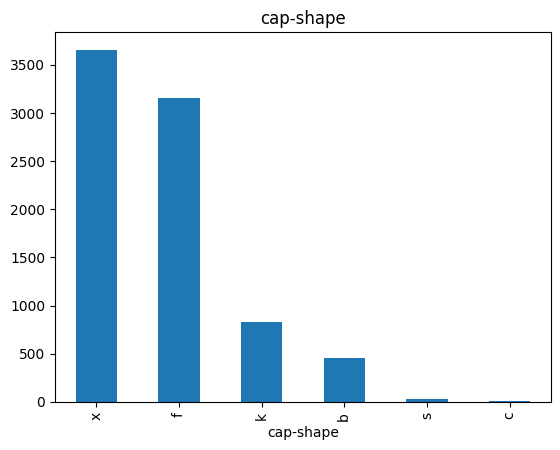

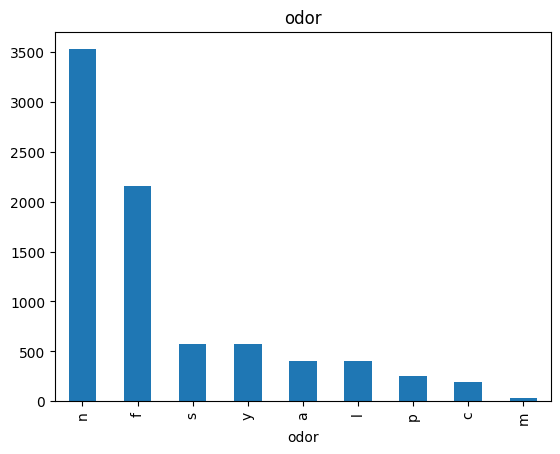

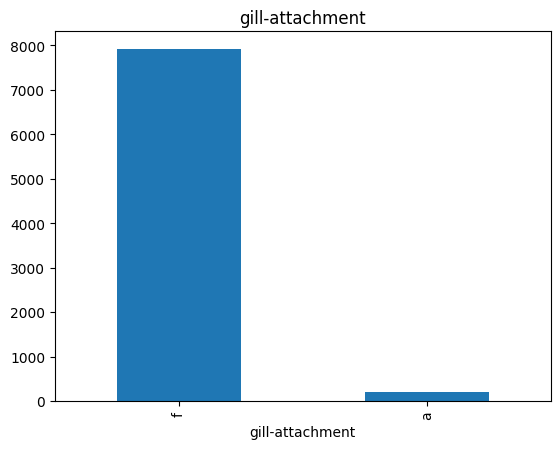

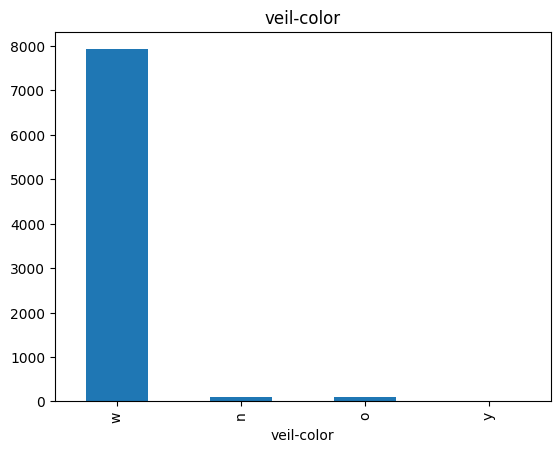

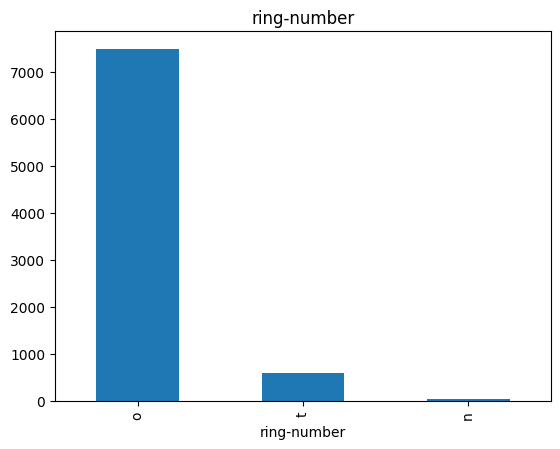

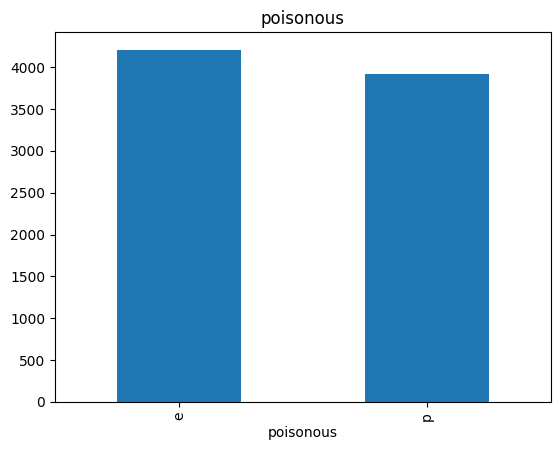

In [7]:
for f in df.columns:
    df[f].value_counts().plot(kind="bar")
    plt.title(f)
    plt.show()

In [8]:
print(len(df.T))

6


Соберем методы в отдельный класс

In [9]:
class Node:
    def __init__(self, T: pd.DataFrame):
        self.children = None
        self.value = None
        self.check = None
        self.T = T
        self.probabilities = None


class ClassificationDecisionTree:
    def __init__(self, df: pd.DataFrame):
        self.root = Node(df)
        self.unique_values = {f: df[f].unique() for f in df.columns}
        print(self.unique_values)
        self.thresholds = [0, 1.0]


    def _entropy(self, C: pd.Series) -> float:
        entropy = 0
        for c in C.unique():
            p = len(C[C == c]) / len(C)
            if p > 0: 
                entropy -= p * math.log2(p)
        return entropy
    
    def _term_entropy(self, T:pd.DataFrame, check: str, C:str) -> float:
        sum = 0
        for t in T[check].unique():
            entropy = self._entropy(T[T[check] == t][C])
            sum += len(T[T[check] == t])/len(T) * entropy
        return sum
    
    def _split(self, T: pd.DataFrame, check: str)-> float:
        total_count = len(T)
        entropy = 0.0
        for value in T[check].unique():
            value_count = len(T[T[check] == value])
            probability = value_count / total_count
            
            if probability > 0:  
                entropy -= probability * math.log2(probability)
        if entropy == 0:
            return eps
        return entropy
    
    def _gain(self, T: pd.DataFrame, check: str, C:str) -> float:
        return (self._entropy(T[C]) - self._term_entropy(T, check, C))/self._split(T, check)

    def predict(self, x: pd.Series):
        t = self.root
        while (t.children is not None) and (t.check is not None):
            t = t.children[x[t.check]]
        return t.value
    

    def _build(self, T: pd.DataFrame, node: Node = None) -> Node:
        if node is None:
            node = self.root

        if len(T[target_name].unique()) == 1:
            node.value = T[target_name].unique()[0]
            node.probabilities = dict()
            node.probabilities[node.value] = 1.0
            return node
        
        check_str = T.columns[pd.Series([self._gain(T, f, target_name) for f in  np.delete(T.columns, np.where(T.columns == target_name))]).argmax()]
        node.check = check_str
        unique_checks = self.unique_values[check_str]
        node.children = dict()
        unique_checks = np.delete(unique_checks, np.where(unique_checks == target_name))
        for t in unique_checks:
            filtered_data = T[T[check_str] == t]
            cur_node = Node(filtered_data)
            if filtered_data.empty or len(filtered_data) == len(T):
                cur_node.value = T[target_name].mode()[0]
                counts = Counter(T[target_name])
                cur_node.probabilities = dict({cls: count/len(T) for cls, count in counts.items()})
                self.thresholds += {count/len(T) for _, count in counts.items()}
                continue
            else:
                cur_node = self._build(filtered_data, cur_node)
            node.children[t] = cur_node
        return node
    
    def fit(self, T: pd.DataFrame):
        self._build(T)

    def error_matrix(self, X_test: pd.DataFrame, y_test: pd.Series) -> pd.DataFrame:
        unique_classes = y_test.unique()

        m_err = pd.DataFrame(0, index=[f"Actual result is {y}" for y in unique_classes],
                             columns=[f"Predicted result is {y}" for y in unique_classes])

        for x, y in zip(X_test.iterrows(), y_test):
            actual_label = f"Actual result is {y}"
            predicted_label = f"Predicted result is {self.predict(x[1])}"
            m_err.at[actual_label, predicted_label] += 1

        return m_err
    
    def accuracy(self, X_test: pd.DataFrame, y_test: pd.Series) -> float:
        m_err = self.error_matrix(X_test, y_test)
        return m_err.values.diagonal().sum() / m_err.values.sum()
    
    def precision(self, X_test: pd.DataFrame, y_test: pd.Series) -> float:
        m_err = self.error_matrix(X_test, y_test)
        return m_err.values.diagonal() / m_err.values.sum(axis=1)
    
    def recall(self, X_test: pd.DataFrame, y_test: pd.Series) -> float:
        m_err = self.error_matrix(X_test, y_test)
        return m_err.values.diagonal() / m_err.values.sum(axis=1)
    
    def f1_score(self, X_test: pd.DataFrame, y_test: pd.Series) -> float:
        precision = self.precision(X_test, y_test)
        recall = self.recall(X_test, y_test)
        return 2 * precision * recall / (precision + recall + eps)
    
    def _I(self, a, b):
        if a < b:
            return 0
        
        if a == b:
            return 0.5
        
        if a > b:
            return 1
        
    def TPR(self, X_test: pd.DataFrame, y_test: pd.DataFrame, threshold: float = 0.5) -> float:
        TP = 0
        FN = 0
        for x, y in zip(X_test.iterrows(), y_test):
            pred = self.predict_proba(x[1])
            if "p" in pred.keys() and pred["p"] > threshold and y == "p":
                TP += 1

            if "p" in pred.keys() and pred["p"] < threshold and y == "p":
                FN += 1
            
        return TP / (TP + FN)
    
        
    def FPR(self, X_test: pd.DataFrame, y_test: pd.DataFrame, threshold: float = 0.5) -> float:
        TN = 0
        FP = 0
        for x, y in zip(X_test.iterrows(), y_test):
            pred = self.predict_proba(x[1])
            if "p" in pred.keys() and pred["p"] < threshold and y != "p":
                TN += 1

            if "p" in pred.keys() and pred["p"] > threshold and y != "p":
                FP += 1
            
        return TN / (FP + TN)

    def predict_proba(self, x: pd.Series) -> zip:
        t = self.root
        while (t.children is not None) and (t.check is not None):
            t = t.children[x[t.check]]
        return t.probabilities
    
    def roc(self, X_test: pd.DataFrame, y_test: pd.DataFrame):
        self.thresholds.sort()
        points = []
        for threshold in self.thresholds:
            points.append([self.FPR(X_test, y_test, threshold), self.TPR(X_test, y_test, threshold)])
        points_df = pd.DataFrame(points, columns=['FPR', 'TPR'])

        plt.figure(figsize=(8, 6))
        plt.plot(points_df['FPR'], points_df['TPR'], marker='o', label='ROC Curve')
        plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')  # Линия случайного угадывания
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()


In [10]:
tree = ClassificationDecisionTree(X_train)
tree._entropy(target)

{'cap-shape': array(['x', 'k', 'f', 'b', 's', 'c'], dtype=object), 'odor': array(['f', 's', 'n', 'y', 'c', 'l', 'm', 'a', 'p'], dtype=object), 'gill-attachment': array(['f', 'a'], dtype=object), 'veil-color': array(['w', 'n', 'o', 'y'], dtype=object), 'ring-number': array(['o', 't', 'n'], dtype=object)}


0.9990678968724603

In [11]:
X_train[target_name] = y_train

In [12]:
tree.fit(X_train)

In [13]:
tree.predict(X_test.iloc[0])


'p'

In [14]:
tree.error_matrix(X_test, y_test)

KeyError: 'x'

In [ ]:
accuracy = tree.accuracy(X_test, y_test)
precision = tree.precision(X_test, y_test).mean()
recall = tree.recall(X_test, y_test).mean()
f1_score = tree.f1_score(X_test, y_test).mean()
print(accuracy, precision, recall, f1_score)

In [ ]:
tree.FPR(X_test, y_test)


In [ ]:
tree.TPR(X_test, y_test)


In [ ]:
tree.roc(X_test, y_test)